In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22936


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22931,2021-05-13,47,沖縄県,126,13487,0,140
22932,2021-05-14,47,沖縄県,134,13621,0,140
22933,2021-05-15,47,沖縄県,160,13781,1,141
22934,2021-05-16,47,沖縄県,78,13859,0,141
22935,2021-05-17,47,沖縄県,59,13918,1,142


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10736,7515,131
43,香川県,18056,1815,24
44,高知県,19032,1158,20
45,鳥取県,15128,439,2
46,鹿児島県,22448,2909,28


## 都道府県ごとの最新データを付与

In [4]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
22929,2021-05-11,47,沖縄県,132,13252,0,139,548.0
22930,2021-05-12,47,沖縄県,109,13361,1,140,594.0
22931,2021-05-13,47,沖縄県,126,13487,0,140,681.0
22932,2021-05-14,47,沖縄県,134,13621,0,140,733.0
22933,2021-05-15,47,沖縄県,160,13781,1,141,800.0
22934,2021-05-16,47,沖縄県,78,13859,0,141,775.0
22935,2021-05-17,47,沖縄県,59,13918,1,142,798.0


In [5]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数"]]
latest.head()

,都道府県名,直近1週間の感染者数
487,北海道,3684.0
975,青森県,168.0
1463,岩手県,137.0
1951,宮城県,224.0
2439,秋田県,91.0


In [6]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数
0,三重県,11712,4490,96,319.0
1,京都府,12688,14779,196,967.0
2,佐賀県,20008,2253,16,256.0
3,兵庫県,13664,37669,895,2118.0
4,北海道,488,30774,944,3684.0


## 人口データを付与

In [7]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [8]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口
0,三重県,11712,4490,96,319.0,1813859
1,京都府,12688,14779,196,967.0,2545899
2,佐賀県,20008,2253,16,256.0,823810
3,兵庫県,13664,37669,895,2118.0,5549568
4,北海道,488,30774,944,3684.0,5267762


## 人口当たりの感染者数

In [9]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,488,30774,944,3684.0,5267762,58.419496,584.194958,69.934822
41,青森県,976,1981,27,168.0,1275783,15.527719,155.277191,13.168384
19,岩手県,1464,1241,40,137.0,1235517,10.044378,100.443782,11.088476
11,宮城県,1952,8577,78,224.0,2292385,37.415181,374.151811,9.771483
36,秋田県,2440,692,9,91.0,985416,7.022415,70.224149,9.234679
15,山形県,2928,1729,37,121.0,1082296,15.975297,159.752970,11.179936
35,福島県,3416,4268,131,340.0,1881981,22.678231,226.782311,18.066070
38,茨城県,3904,9094,137,488.0,2921436,31.128527,311.285272,16.704114
27,栃木県,4392,5867,74,239.0,1965516,29.849668,298.496680,12.159657
37,群馬県,4880,7239,117,472.0,1969439,36.756660,367.566601,23.966216


## 感染者数

### 平均値、中央値

In [10]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      14583.404255
std       27532.822483
min         437.000000
25%        2117.000000
50%        4374.000000
75%        8842.500000
max      152658.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [11]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6344,152658,1958,5491.0,13834925,110.342485,1103.424847,39.689409
1,大阪府,13176,95157,1981,4947.0,8849635,107.526469,1075.264686,55.900611
2,神奈川県,6832,58070,858,2096.0,9209442,63.054852,630.548517,22.759251
3,埼玉県,5368,41688,766,1680.0,7390054,56.410955,564.109545,22.733257
4,愛知県,11224,41134,675,3958.0,7575530,54.298511,542.985111,52.247170
5,兵庫県,13664,37669,895,2118.0,5549568,67.877355,678.773555,38.165133
6,千葉県,5856,35599,655,1042.0,6319772,56.329564,563.295638,16.487937
7,北海道,488,30774,944,3684.0,5267762,58.419496,584.194958,69.934822
8,福岡県,19520,30523,395,3320.0,5129841,59.500870,595.008695,64.719355
9,京都府,12688,14779,196,967.0,2545899,58.050221,580.502212,37.982654


## １万人あたりの感染者数

### 平均値、中央値

In [12]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      34.278638
std       24.682338
min        6.432866
25%       17.828390
50%       26.062134
75%       45.837888
max      110.342485
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [13]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,488,30774,944,3684.0,5267762,58.419496,584.194958,69.934822
34,福岡県,19520,30523,395,3320.0,5129841,59.500870,595.008695,64.719355
18,岡山県,16104,6244,73,1120.0,1903627,32.800543,328.005434,58.835055
9,大阪府,13176,95157,1981,4947.0,8849635,107.526469,1075.264686,55.900611
28,沖縄県,22936,13918,142,798.0,1481547,93.942345,939.423454,53.862618
24,愛知県,11224,41134,675,3958.0,7575530,54.298511,542.985111,52.247170
21,広島県,16592,8591,114,1454.0,2826858,30.390632,303.906316,51.435198
17,岐阜県,10248,7509,143,868.0,2032490,36.944831,369.448312,42.706237
26,東京都,6344,152658,1958,5491.0,13834925,110.342485,1103.424847,39.689409
8,大分県,21472,2916,33,450.0,1151229,25.329452,253.294523,39.088661


## グラフ化

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [15]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


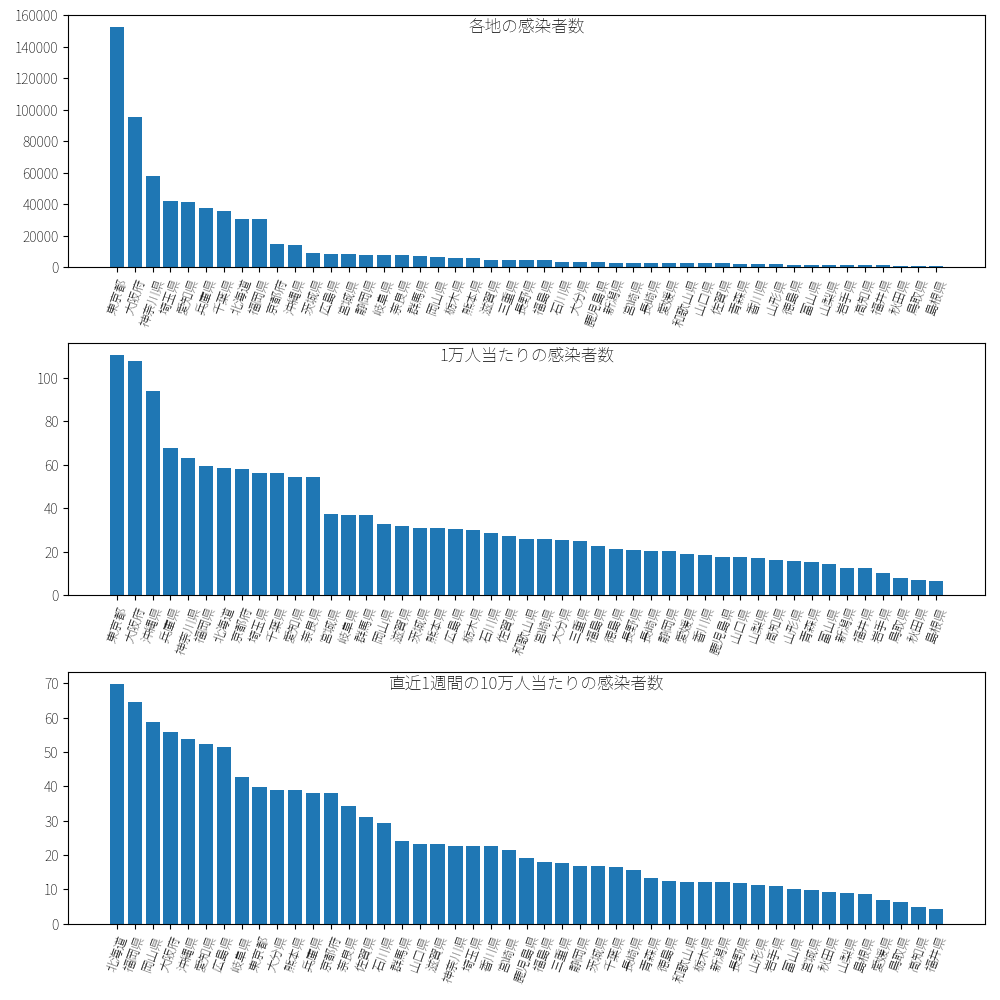

In [16]:
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(3,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


plt.subplot(3,1,3) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_100k["都道府県名"], all_jp_desc_100k["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの感染者数",y=0.9)

fig.tight_layout()


## 度数分布表

In [17]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   437.     19464.625  38492.25   57519.875  76547.5    95575.125
 114602.75  133630.375 152658.   ]


## ヒストグラム

<IPython.core.display.Javascript object>


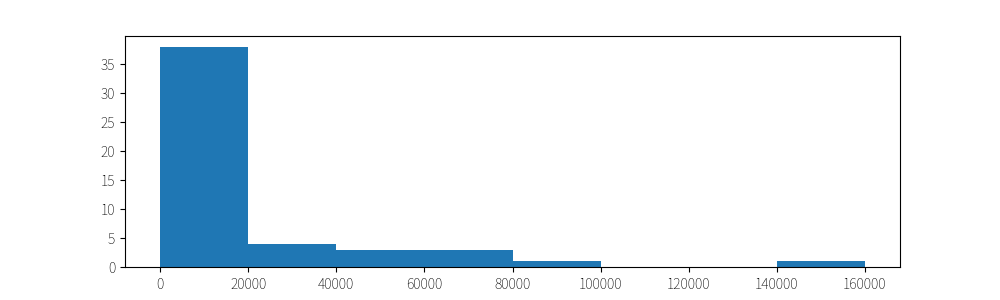

(array([38.,  4.,  3.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [18]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


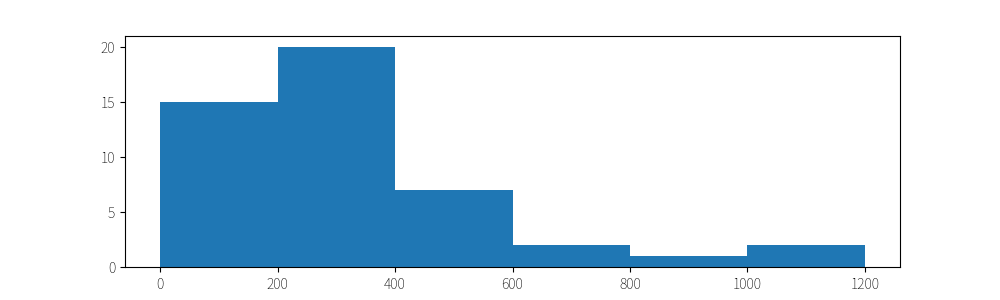

(array([15., 20.,  7.,  2.,  1.,  2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [19]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
